In [73]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Math 775 Project Part 2
## Course Instructor: Dr. Sang
## Gauree Wathodkar

In this time series analysis project, we want to evaluate call and put option for some given stocks, using Black-Scholes formula.

For using the Black-Scholes formula, we need to first make sure that the given time series follows the geometric Brownian motion. 

Here we will consider time series of daily stock prices of two stocks:


1) Amazon stock.

I have downloaded the historical data of stock prices for last five years from the following link:

https://finance.yahoo.com/quote/AMZN/history?period1=1512172800&period2=1669939200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

This data had multiple prices for same day. For example, Opening price, Maximum price, etc. We choose closing price as our dataset.


2) Apple Stock

I have downloaded the historical data of stock prices for last ten years from the following link:

https://finance.yahoo.com/quote/AAPL/history?period1=1354924800&period2=1670457600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

This data had multiple prices for same day. For example, Opening price, Maximum price, etc. We choose closing price as our dataset.

3) Meta Stock

We will consider Historical data of seven years daily stock prices of Meta stock. I downloaded it from following link:

https://finance.yahoo.com/quote/META/history?period1=1449532800&period2=1670457600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

This data also has multiple prices, we will consider closing price.


4) Qualcom Stock

We will consider historical data of Qualcom for five years. We will consider the closing price.

Source: https://finance.yahoo.com/quote/QCOM/history?period1=1512691200&period2=1670457600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true



### A] To check if it is geometrical Brownian motion:






   We take log of data. 
    
   Then we get distribution Y as log difference. i.e. we have, for every point $Y_i$ = $log(S_{t_i}/S_{t_{(i-1)}})$.
   
   Then we plot the histogram and Q-Q plot of the Y.
   
   If the histogram is bell-shaped and the Q-Q plot shows that it follows noramal distribution, then we can say that the time series follows simple Brownian motion
   
   


   
   
### B] Calculating call and put option.
    
   First we calculate the sample mean $\overline{Y}$ and variance $s_Y^2$ of distribution Y.
   
   Then we calculate parameters $\hat{\sigma}$ and $\hat{\mu}$ by using sample mean and variance.
   
   We set values for current stock price as $S_0$, time of maturity $T$, rate of risk free interest $r$, and two strike prices $K_1$ and $K_2$.
   
   For $K_1$,
    Using all these values, we first calculate $d_1$ and $d_2$; further we calculate call option $C$ using these values. Then we calculate put option using call-put pairity.
   
   Then we repeat the procedure for $K_2$.

To start this project, we will first load the packages we will need.

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as py
import statistics
import math 
import scipy.stats as stats
import matplotlib.pyplot as plt


## AMAZON STOCK

We import the csv data of the daily stock prices of Amazon stock for last five years.

In [4]:
data = pd.read_csv(r'/home/gauree/Downloads/AMZN.csv')   
print(data)

            Date       Open       High        Low      Close  Adj Close  \
0     2017-12-04  58.692501  58.759998  56.400002  56.697498  56.697498   
1     2017-12-05  56.412998  57.963501  56.237000  57.078499  57.078499   
2     2017-12-06  56.899502  57.794498  56.804001  57.617500  57.617500   
3     2017-12-07  57.829498  58.159500  57.549999  57.989498  57.989498   
4     2017-12-08  58.520000  58.639500  57.855000  58.099998  58.099998   
...          ...        ...        ...        ...        ...        ...   
1253  2022-11-25  93.790001  94.430000  93.070000  93.410004  93.410004   
1254  2022-11-28  93.930000  96.400002  93.430000  93.949997  93.949997   
1255  2022-11-29  94.040001  94.410004  91.440002  92.419998  92.419998   
1256  2022-11-30  92.470001  96.540001  91.529999  96.540001  96.540001   
1257  2022-12-01  96.989998  97.230003  94.919998  95.500000  95.500000   

         Volume  
0     118638000  
1      81596000  
2      57066000  
3      50232000  
4      61

We choose only Closing prices of stock each day.

In [5]:
df = pd.DataFrame(data, columns=['Date', 'Close'])
print(df)

            Date      Close
0     2017-12-04  56.697498
1     2017-12-05  57.078499
2     2017-12-06  57.617500
3     2017-12-07  57.989498
4     2017-12-08  58.099998
...          ...        ...
1253  2022-11-25  93.410004
1254  2022-11-28  93.949997
1255  2022-11-29  92.419998
1256  2022-11-30  96.540001
1257  2022-12-01  95.500000

[1258 rows x 2 columns]


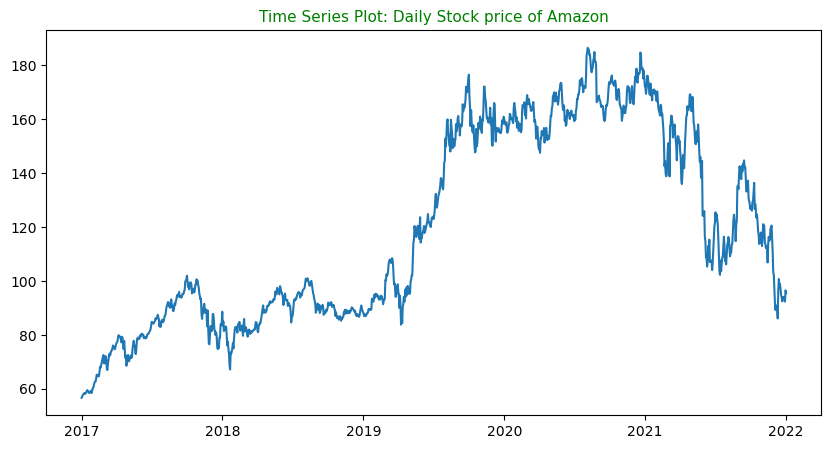

In [6]:
price=df['Close']
x=np.linspace(2017,2022,1258)
f=plt.figure(figsize=(10,5))
plt.plot(x,price)

plt.title("Time Series Plot: Daily Stock price of Amazon",fontsize=11,
          color="green")
plt.show()

### Step A

For step A, we start with calculating the log price of data.Also, we will plot it.

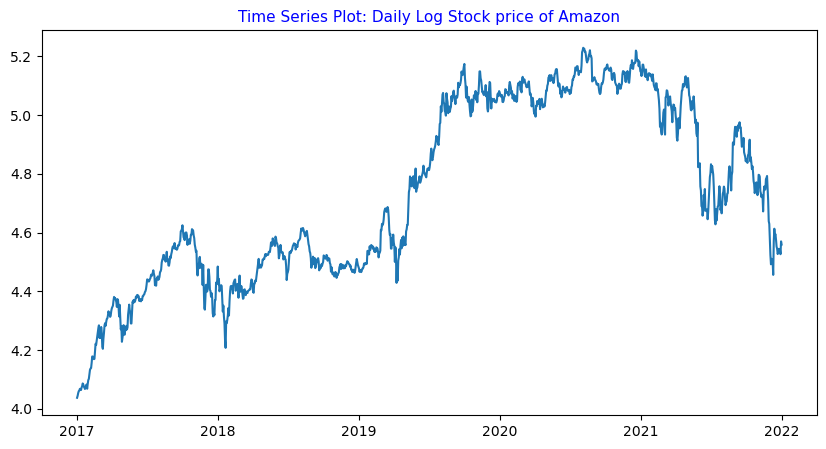

In [8]:
log_pr=np.log(price)
f=plt.figure(figsize=(10,5))
plt.plot(x,log_pr)
plt.title("Time Series Plot: Daily Log Stock price of Amazon",fontsize=11,
          color="blue")
plt.show()

Using the formula $Y_i$ = $log(S_{t_i}/S_{t_{(i-1)}})= log(S_{t_i})-log(S_{t_(i-1)})$; we calculate $Y$ distribution

Text(0.5, 1.0, 'Plot of $Y_i$')

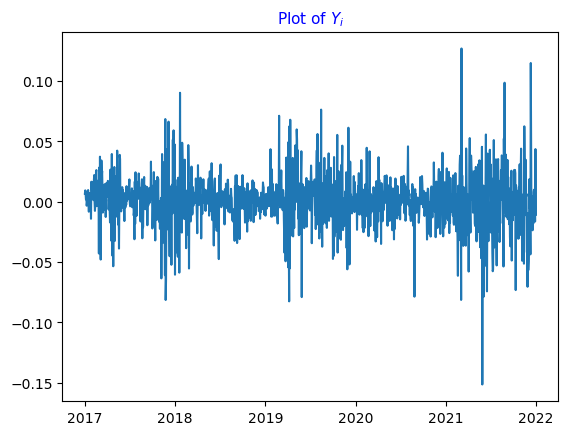

In [11]:
Y = np.diff(log_pr)

y=x[:-1]

plt.plot(y,Y)
plt.title("Plot of $Y_i$",fontsize=11,color="blue")

To check if data is normally distributed or not, we will plot the histogram and Q-Q plot of the Y.

Generally, histogram gives us an approximate idea but Q-Q plot is more reliable for decision.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   4.,   2.,   2.,   6.,  13.,   8.,  13.,  15.,  30.,
         39.,  64.,  76., 114., 160., 179., 177., 131.,  60.,  54.,  25.,
         25.,  21.,  12.,   6.,   5.,   3.,   4.,   1.,   0.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   1.]),
 array([-0.15139791, -0.14583098, -0.14026404, -0.1346971 , -0.12913017,
        -0.12356323, -0.11799629, -0.11242936, -0.10686242, -0.10129548,
        -0.09572855, -0.09016161, -0.08459467, -0.07902774, -0.0734608 ,
        -0.06789387, -0.06232693, -0.05675999, -0.05119306, -0.04562612,
        -0.04005918, -0.03449225, -0.02892531, -0.02335837, -0.01779144,
        -0.0122245 , -0.00665756, -0.00109063,  0.00447631,  0.01004325,
         0.01561018,  0.02117712,  0.02674406,  0.03231099,  0.03787793,
         0.04344487,  0.0490118 ,  0.05457874,  0.06014568,  0.06571261,
         0.07127955,  0.07684649,  0.08241342,  0.08798036,  0.0935473 ,
 

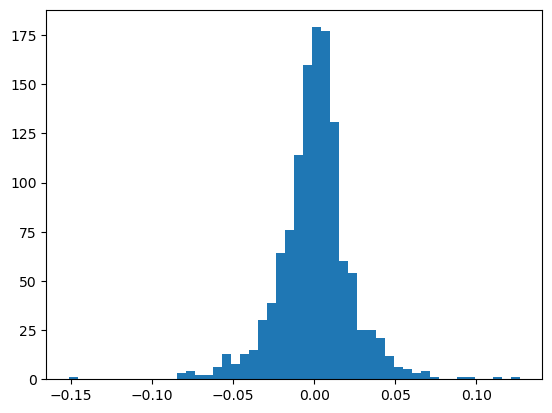

In [12]:
plt.hist(Y,bins=50)

This histogram looks bell shaped and symmetric, so we can say the distribution is Normal. But to confirm it we will use Q-Q plot.

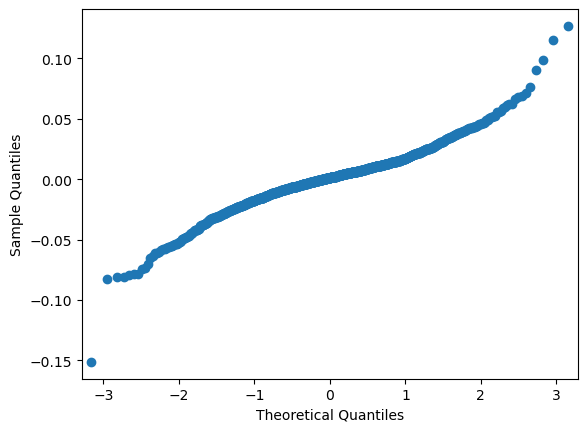

In [13]:
sm.qqplot(Y)
py.show()

Here we an clearly see, Q-Q plot is very near to the axis at $45$ degree. So, it reassures that the distribution must be normal.

So, it is evident that the Y distribution is Normal. (By observing both histogram and Q-Q plot)

And thus, our data follows the Geometric Brownian motion.

### Step B

To calculate call and put option we need to start with calculating basic parameters.

We calculate the sample mean $\overline{Y}$ and variance $s_Y^2$ of distribution Y.

In [16]:
sample_mean_y= statistics.mean(Y)
print(sample_mean_y)
sample_variance_y = statistics.variance(Y)
print(sample_variance_y)

0.0004147940848931812
0.0005026656690848184


$\Delta$ is given as $\Delta =\frac{1}{252}$

In [17]:
Delta= 1/252

By the estimate of $\hat{\sigma}$ and $\hat{\mu}$, we get,

$\hat{\sigma}=\frac{s_Y}{\sqrt{\Delta}}$ and $\hat{\mu}= \frac{\overline{Y}}{\Delta}+\frac{\hat{\sigma}^2}{2} = \frac{\overline{Y}}{\Delta}+\frac{s_Y^2}{2\Delta}$

In [21]:
sigma= (sample_variance_y /Delta)**(1/2)
mu= sample_mean_y/Delta+sigma**2/2
print(sigma)
print(mu)

0.35590974784258755
0.16786398369776878


To use Black- Scholes formula, we need to calculate parameters $d_1$ and $d_2$. 

For that we need to set up some basic variables.

$S_0$- current stock price

$r$ - rate of risk free interest

$T$ - time of maturity

and we will set two strike prices $K_1$ and $K_2$.

In [22]:
S_0=price[1257]

r= 0.06


T=0.5

K_1=S_0+20
K_2= S_0-10


#### Calculations for $K_1$:



Now to use Black-Scholes formula, we find $d_1$ and $d_2$.

$d_1 = \frac{log\left(\frac{S_0}{K}\right)+ \left(r+\frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}$

$d_2 = \frac{log\left(\frac{S_0}{K}\right)+ \left(r-\frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}} = d_1 - \sigma \sqrt{T}$

In [23]:
d_1 = (math.log(S_0/K_1)+(r+sigma**2/2)*T)/(sigma*math.sqrt(T))
print(d_1)

d_2 = d_1 - (sigma*math.sqrt(T))
print(d_2)

-0.5105029887521397
-0.7621691849420276


### Black - Scholes Formula

$C= S_0 \Phi(d_1)-Ke^{-rT} \Phi(d_2)$

where, $C$ is the call option,

$S_0$, $d_1$, $d_2$, $K$, $r$, and $T$ are as specified above,
       
       
   and $\Phi(z)$ is area to the left of $z$-score in standard normal distribution or the table area in $z$-table.

In [24]:
z_1 = stats.norm.cdf(d_1)
print(z_1)
z_2 = stats.norm.cdf(d_2)
print(z_2)

0.3048495606269923
0.22297951752488882


In [25]:
C= S_0*z_1-K_1*math.exp(-r*T)*z_2
print(C)

4.12014846314494


To calculate put option, we will use call put pairity for European call and put option, given by:

$C+Ke^{-rt}=P+S_0$

here $P$ is the put option.

In [26]:
P= C+K_1*math.exp(-r*T)-S_0
print(P)

20.706607587997638


#### Calculations for $K_1$:

First we calculate $d_1$ and $d_2$.

In [27]:
d_1 = (math.log(S_0/K_2)+(r+sigma**2/2)*T)/(sigma*math.sqrt(T))
print(d_1)

d_2 = d_1 - (sigma*math.sqrt(T))
print(d_2)

0.6845488639496345
0.43288266775974665


Then we calculate $\Phi(d_1)$ and $\Phi(d_2)$ as $z_1$ and $z_2$:

In [28]:
z_1 = stats.norm.cdf(d_1)
print(z_1)
z_2 = stats.norm.cdf(d_2)
print(z_2)

0.7531856776134099
0.667449993880609


then we calculate call option using Black- Scholes formula:

In [30]:
C= S_0*z_1-K_2*math.exp(-r*T)*z_2
print(C)

16.548841717951078


and finally, the put option:

In [69]:
P= C+K_2*math.exp(-r*T)-S_0
print(P)

7.331158445181686


## APPLE STOCK

We import the csv data of the daily stock prices of Apple stock for last ten years.

In [32]:
data = pd.read_csv(r'/home/gauree/Downloads/AAPL1.csv')   
print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     2012-12-10   18.750000   19.232500   18.627857   18.922144   16.272810   
1     2012-12-11   19.277500   19.627144   19.191786   19.335358   16.628164   
2     2012-12-12   19.563213   19.571428   19.152500   19.250000   16.554764   
3     2012-12-13   18.969643   19.201429   18.778570   18.917500   16.268820   
4     2012-12-14   18.383928   18.504642   18.056429   18.206785   15.657616   
...          ...         ...         ...         ...         ...         ...   
2512  2022-12-01  148.210007  149.130005  146.610001  148.309998  148.309998   
2513  2022-12-02  145.960007  148.000000  145.649994  147.809998  147.809998   
2514  2022-12-05  147.770004  150.919998  145.770004  146.630005  146.630005   
2515  2022-12-06  147.070007  147.300003  141.919998  142.910004  142.910004   
2516  2022-12-07  142.190002  143.369995  140.000000  140.940002  140.940002   

          Volume  
0      630484400  
1

We choose only Closing prices of stock each day.

In [33]:
df = pd.DataFrame(data, columns=['Date', 'Close'])
print(df)

            Date       Close
0     2012-12-10   18.922144
1     2012-12-11   19.335358
2     2012-12-12   19.250000
3     2012-12-13   18.917500
4     2012-12-14   18.206785
...          ...         ...
2512  2022-12-01  148.309998
2513  2022-12-02  147.809998
2514  2022-12-05  146.630005
2515  2022-12-06  142.910004
2516  2022-12-07  140.940002

[2517 rows x 2 columns]


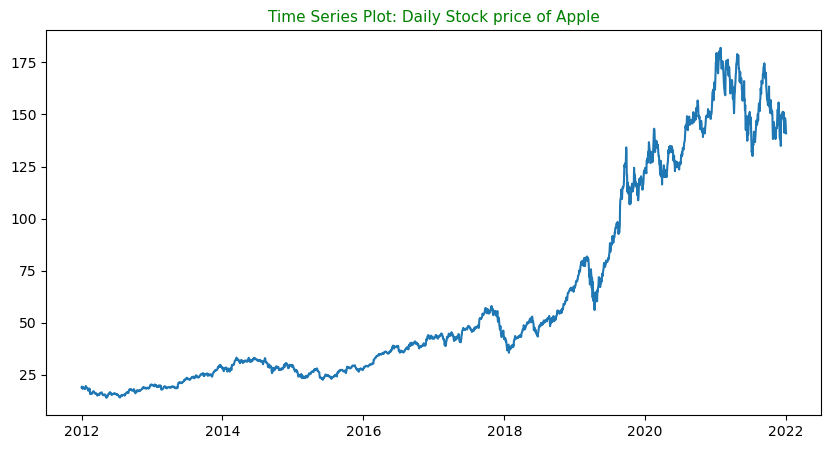

In [34]:
price=df['Close']
x=np.linspace(2012,2022,2517)
f=plt.figure(figsize=(10,5))
plt.plot(x,price)

plt.title("Time Series Plot: Daily Stock price of Apple",fontsize=11,
          color="green")
plt.show()

### Step A

For step A, we start with calculating the log price of data.

After that we will use $Y$ distribution (same as we calculated for Amazon stock) and we will use histogram and Q-Q plot to predict normality.

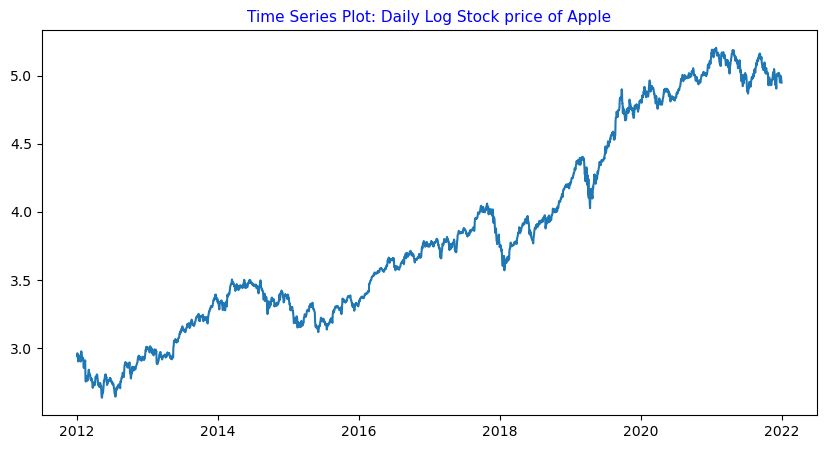

In [36]:
log_pr=np.log(price)
f=plt.figure(figsize=(10,5))
plt.plot(x,log_pr)
plt.title("Time Series Plot: Daily Log Stock price of Apple",fontsize=11,color="blue")
plt.show()

Text(0.5, 1.0, 'Plot of $Y_i$')

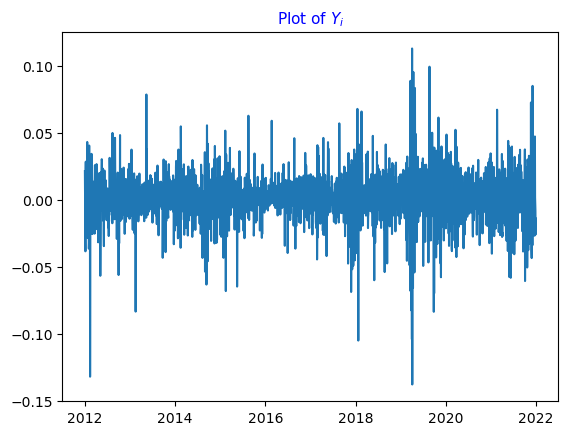

In [38]:
Y = np.diff(log_pr)

y=x[:-1]

plt.plot(y,Y)
plt.title("Plot of $Y_i$",fontsize=11,color="blue")

(array([  1.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,
          1.,   0.,   4.,   3.,   4.,   7.,   7.,  12.,  17.,  27.,  39.,
         78.,  93., 126., 223., 364., 408., 332., 250., 192., 118.,  72.,
         50.,  30.,  17.,  10.,   8.,   3.,   3.,   2.,   3.,   0.,   1.,
          2.,   1.,   1.,   1.,   0.,   1.]),
 array([-0.13770804, -0.13269073, -0.12767342, -0.12265611, -0.1176388 ,
        -0.11262149, -0.10760418, -0.10258687, -0.09756956, -0.09255225,
        -0.08753494, -0.08251763, -0.07750032, -0.07248301, -0.0674657 ,
        -0.06244839, -0.05743108, -0.05241377, -0.04739646, -0.04237915,
        -0.03736184, -0.03234453, -0.02732722, -0.0223099 , -0.01729259,
        -0.01227528, -0.00725797, -0.00224066,  0.00277665,  0.00779396,
         0.01281127,  0.01782858,  0.02284589,  0.0278632 ,  0.03288051,
         0.03789782,  0.04291513,  0.04793244,  0.05294975,  0.05796706,
         0.06298437,  0.06800168,  0.07301899,  0.0780363 ,  0.08305361,
 

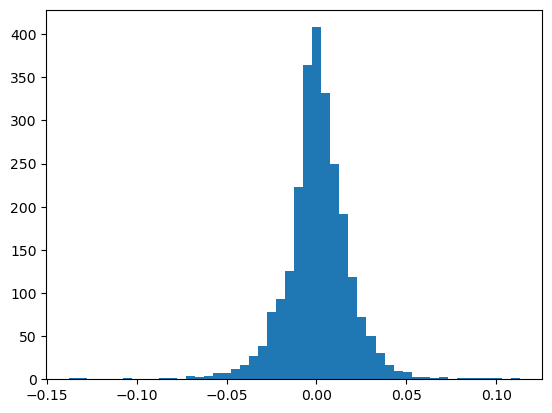

In [40]:
plt.hist(Y,bins=50)

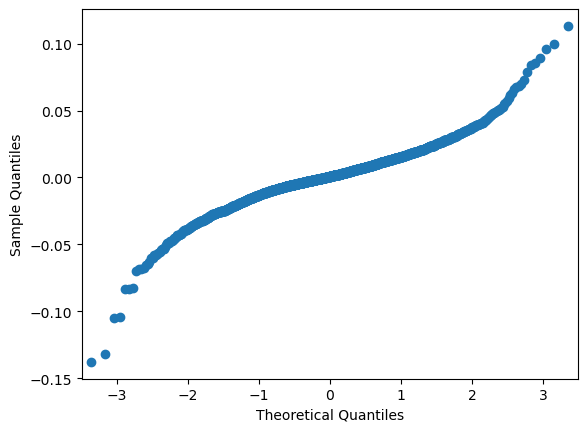

In [39]:
sm.qqplot(Y)
py.show()

Histogram is almost bell- shaped but clearly Q-Q ploy indicates that this the Y distribution is not normal. 

and thus, this stock does NOT follow Geometrical Brownian Motion.

### META stock

we have data of seven years of daily stock prices of Meta stock and we will try to repeat the same procedure for it.

In [41]:
data = pd.read_csv(r'/home/gauree/Downloads/META.csv')   
print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     2015-12-08  104.000000  106.910004  103.949997  106.489998  106.489998   
1     2015-12-09  106.180000  106.440002  103.550003  104.599998  104.599998   
2     2015-12-10  105.050003  106.400002  104.410004  105.419998  105.419998   
3     2015-12-11  104.150002  104.339996  101.910004  102.120003  102.120003   
4     2015-12-14  102.290001  104.739998  101.459999  104.660004  104.660004   
...          ...         ...         ...         ...         ...         ...   
1758  2022-12-01  119.199997  121.199997  118.400002  120.440002  120.440002   
1759  2022-12-02  117.830002  124.040001  117.610001  123.489998  123.489998   
1760  2022-12-05  121.750000  124.669998  121.349998  122.430000  122.430000   
1761  2022-12-06  119.910004  120.550003  113.739998  114.120003  114.120003   
1762  2022-12-07  113.760002  115.879997  112.879997  113.930000  113.930000   

        Volume  
0     20401800  
1    

In [42]:
df = pd.DataFrame(data, columns=['Date', 'Close'])
print(df)

            Date       Close
0     2015-12-08  106.489998
1     2015-12-09  104.599998
2     2015-12-10  105.419998
3     2015-12-11  102.120003
4     2015-12-14  104.660004
...          ...         ...
1758  2022-12-01  120.440002
1759  2022-12-02  123.489998
1760  2022-12-05  122.430000
1761  2022-12-06  114.120003
1762  2022-12-07  113.930000

[1763 rows x 2 columns]


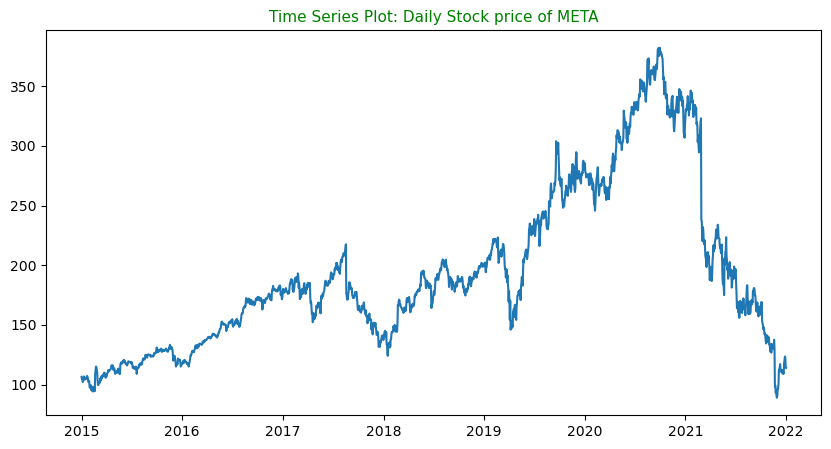

In [43]:
price=df['Close']
x=np.linspace(2015,2022,1763)
f=plt.figure(figsize=(10,5))
plt.plot(x,price)

plt.title("Time Series Plot: Daily Stock price of META",fontsize=11,color="green")
plt.show()

### Step A

For step A, we start with calculating the log price of data.

After that we will use $Y$ distribution (same as we calculated for above stocks) and we will use histogram and Q-Q plot to predict normality.

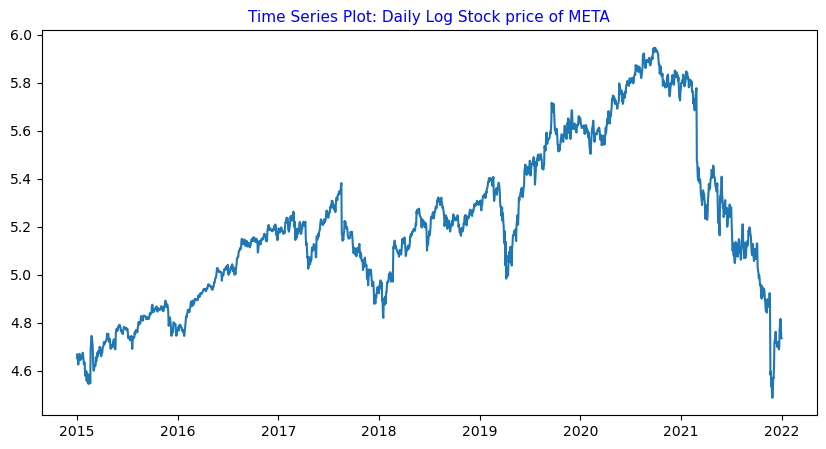

In [44]:
log_pr=np.log(price)
f=plt.figure(figsize=(10,5))
plt.plot(x,log_pr)
plt.title("Time Series Plot: Daily Log Stock price of META",fontsize=11,color="blue")
plt.show()

Text(0.5, 1.0, 'Plot of $Y_i$')

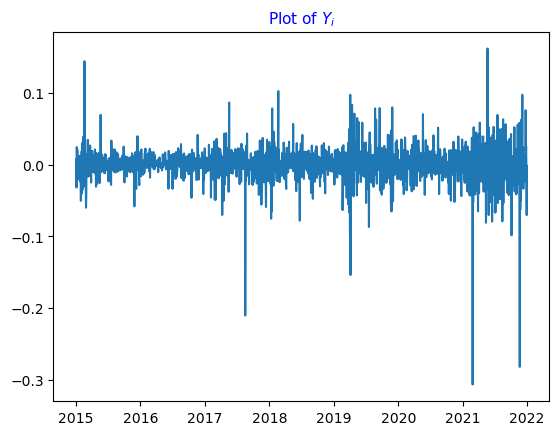

In [46]:
Y = np.diff(log_pr)

y=x[:-1]

plt.plot(y,Y)
plt.title("Plot of $Y_i$",fontsize=11,color="blue")

(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          2.,   1.,   5.,  12.,   8.,  23.,  44.,  60., 131., 236., 469.,
        339., 246.,  84.,  36.,  22.,  19.,   5.,   5.,   6.,   0.,   3.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([-0.30639058, -0.29702148, -0.28765238, -0.27828328, -0.26891418,
        -0.25954508, -0.25017598, -0.24080688, -0.23143778, -0.22206868,
        -0.21269958, -0.20333048, -0.19396138, -0.18459229, -0.17522319,
        -0.16585409, -0.15648499, -0.14711589, -0.13774679, -0.12837769,
        -0.11900859, -0.10963949, -0.10027039, -0.09090129, -0.08153219,
        -0.07216309, -0.06279399, -0.05342489, -0.04405579, -0.03468669,
        -0.02531759, -0.01594849, -0.00657939,  0.00278971,  0.01215881,
         0.02152791,  0.03089701,  0.04026611,  0.04963521,  0.05900431,
         0.06837341,  0.07774251,  0.08711161,  0.09648071,  0.10584981,
 

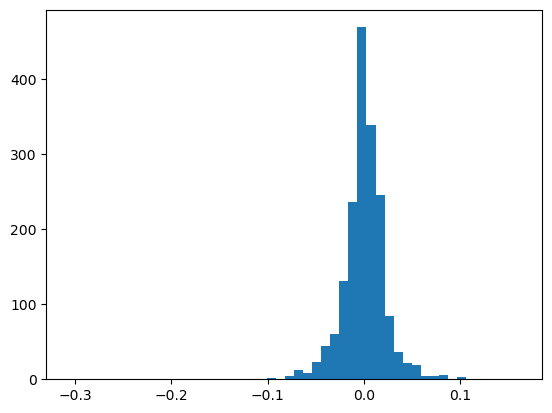

In [48]:
plt.hist(Y,bins=50)

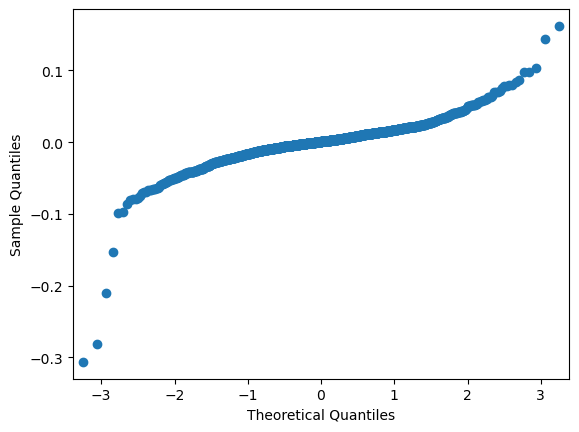

In [49]:
sm.qqplot(Y)
py.show()

Histogram is almost bell- shaped but clearly Q-Q ploy indicates that this the Y distribution is not normal. 

and thus, this stock does NOT follow Geometrical Brownian Motion.

### Qualcom Stock

We do the analysis of Qualcom stock with same procedure

In [50]:
data = pd.read_csv(r'/home/gauree/Downloads/QCOM.csv')   
print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     2017-12-08   65.599998   65.599998   63.880001   64.239998   55.847309   
1     2017-12-11   64.059998   65.260002   64.000000   65.180000   56.664509   
2     2017-12-12   64.879997   65.110001   64.550003   64.860001   56.386318   
3     2017-12-13   64.980003   65.430000   64.830002   64.900002   56.421085   
4     2017-12-14   64.860001   65.169998   64.550003   64.699997   56.247215   
...          ...         ...         ...         ...         ...         ...   
1253  2022-12-01  126.720001  128.199997  125.680000  126.809998  126.809998   
1254  2022-12-02  123.709999  125.820000  123.120003  125.660004  125.660004   
1255  2022-12-05  124.580002  125.470001  122.430000  123.300003  123.300003   
1256  2022-12-06  122.820000  123.000000  118.570000  119.779999  119.779999   
1257  2022-12-07  118.500000  120.320000  117.760002  118.209999  118.209999   

        Volume  
0      9371900  
1    

In [51]:
df = pd.DataFrame(data, columns=['Date', 'Close'])
print(df)

            Date       Close
0     2017-12-08   64.239998
1     2017-12-11   65.180000
2     2017-12-12   64.860001
3     2017-12-13   64.900002
4     2017-12-14   64.699997
...          ...         ...
1253  2022-12-01  126.809998
1254  2022-12-02  125.660004
1255  2022-12-05  123.300003
1256  2022-12-06  119.779999
1257  2022-12-07  118.209999

[1258 rows x 2 columns]


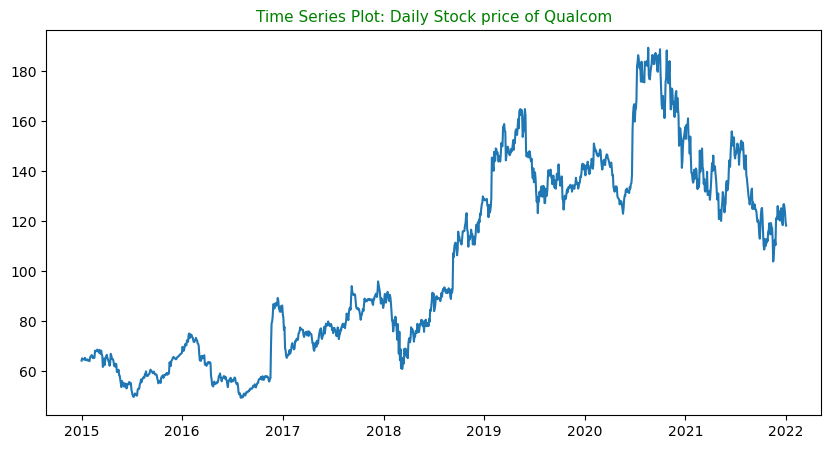

In [52]:
price=df['Close']
x=np.linspace(2015,2022,1258)
f=plt.figure(figsize=(10,5))
plt.plot(x,price)

plt.title("Time Series Plot: Daily Stock price of Qualcom",fontsize=11,color="green")
plt.show()

### Step A

For step A, we start with calculating the log price of data.

After that we will use $Y$ distribution (same as we calculated for above stocks) and we will use histogram and Q-Q plot to predict normality.

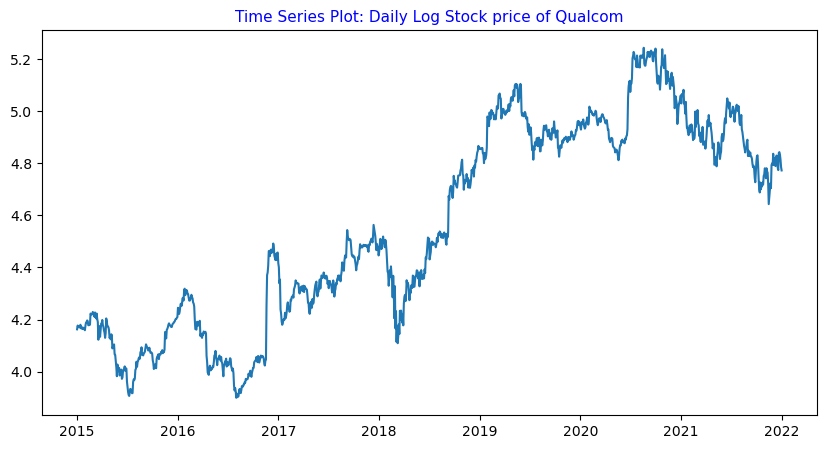

In [53]:
log_pr=np.log(price)
f=plt.figure(figsize=(10,5))
plt.plot(x,log_pr)
plt.title("Time Series Plot: Daily Log Stock price of Qualcom",fontsize=11,color="blue")
plt.show()

Text(0.5, 1.0, 'Plot of $Y_i$')

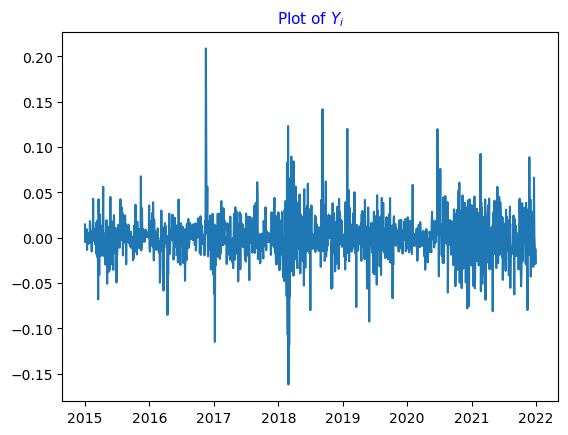

In [54]:
Y = np.diff(log_pr)

y=x[:-1]

plt.plot(y,Y)
plt.title("Plot of $Y_i$",fontsize=11,color="blue")

(array([  1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,   2.,
          5.,   3.,   7.,  15.,  11.,  23.,  42.,  64., 107., 158., 205.,
        206., 138.,  98.,  66.,  33.,  35.,   8.,   8.,   6.,   0.,   2.,
          3.,   1.,   0.,   0.,   1.,   3.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.16187504, -0.15446356, -0.14705208, -0.1396406 , -0.13222912,
        -0.12481763, -0.11740615, -0.10999467, -0.10258319, -0.09517171,
        -0.08776023, -0.08034875, -0.07293727, -0.06552579, -0.05811431,
        -0.05070282, -0.04329134, -0.03587986, -0.02846838, -0.0210569 ,
        -0.01364542, -0.00623394,  0.00117754,  0.00858902,  0.0160005 ,
         0.02341198,  0.03082347,  0.03823495,  0.04564643,  0.05305791,
         0.06046939,  0.06788087,  0.07529235,  0.08270383,  0.09011531,
         0.09752679,  0.10493828,  0.11234976,  0.11976124,  0.12717272,
         0.1345842 ,  0.14199568,  0.14940716,  0.15681864,  0.16423012,
 

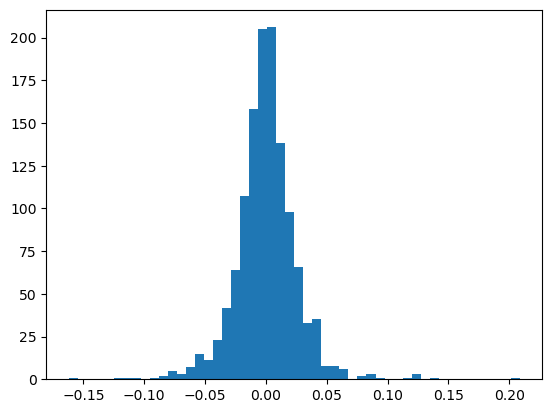

In [55]:
plt.hist(Y,bins=50)

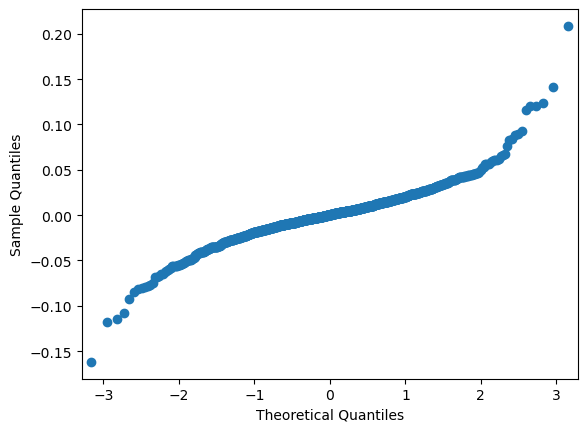

In [56]:
sm.qqplot(Y)
py.show()

Here we an clearly see, Q-Q plot is very near to the axis at $45$ degree. So, it reassures that the distribution must be normal.

So, it is evident that the Y distribution is Normal. (By observing both histogram and Q-Q plot)

And thus, our data follows the Geometric Brownian motion.

### Step B

To calculate call and put option we need to start with calculating basic parameters.

We calculate the sample mean $\overline{Y}$ and variance $s_Y^2$ of distribution Y.

In [57]:
sample_mean_y= statistics.mean(Y)
print(sample_mean_y)
sample_variance_y = statistics.variance(Y)
print(sample_variance_y)

0.0004851524715970639
0.000669053822312738


$\Delta$ is given as $\Delta =\frac{1}{252}$

In [58]:
Delta= 1/252

We estimate of $\hat{\sigma}$ and $\hat{\mu}$.

In [59]:
sigma= (sample_variance_y /Delta)**(1/2)
mu= sample_mean_y/Delta+sigma**2/2
print(sigma)
print(mu)

0.4106112068889621
0.2065592044538651


As done for Amazon stock previously, we do the calculations for following things:

paramters $d_1$ and $d_2$, values of $\Phi(d_1)$ and $\Phi(d_2)$ as $z_1$ and $z_2$ and the call option $C$. 

For that we need to set up some basic variables $S_0$, $r$, $T$ and two strike prices $K_1$ and $K_2$.

In [61]:
S_0=price[1257]

r= 0.06

T=0.5

K_1=S_0+20
K_2= S_0-10

### For $K_1$

In [62]:
d_1 = (math.log(S_0/K_1)+(r+sigma**2/2)*T)/(sigma*math.sqrt(T))
print(d_1)

d_2 = d_1 - (sigma*math.sqrt(T))
print(d_2)

-0.2898651378335078
-0.5802111066558853


In [63]:
z_1 = stats.norm.cdf(d_1)
print(z_1)
z_2 = stats.norm.cdf(d_2)
print(z_2)

0.38595970655347334
0.280886132326306


In [64]:
C= S_0*z_1-K_1*math.exp(-r*T)*z_2
print(C)

7.950366440729709


We calculate put option by call-put pairity of European call and put option:

In [65]:
P= C+K_1*math.exp(-r*T)-S_0
print(P)

23.865643662023487


### For $K_2$

In [66]:
d_1 = (math.log(S_0/K_2)+(r+sigma**2/2)*T)/(sigma*math.sqrt(T))
print(d_1)

d_2 = d_1 - (sigma*math.sqrt(T))
print(d_2)

0.552924197354403
0.2625782285320255


In [67]:
z_1 = stats.norm.cdf(d_1)
print(z_1)
z_2 = stats.norm.cdf(d_2)
print(z_2)

0.7098423412954339
0.603562158755891


#### call option:

In [68]:
C= S_0*z_1-K_2*math.exp(-r*T)*z_2
print(C)

20.529247230343152


#### put option:

In [70]:
P= C+K_2*math.exp(-r*T)-S_0
print(P)

7.331158445181686
